In [1]:
%pylab inline
import seaborn as sns
import numpy as np
import pandas as pd
import cPickle as pickle
from irm import cvpipelineutil
import sklearn.neighbors
import scipy.sparse
import irm
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [2]:
neurons_data = pickle.load(open("../data/mushroombody.neurondf.pickle", 'r'))
synapse_data = pickle.load(open("../data/mushroombody.synapsesdf.pickle", 'r'))
basicmat_data = pickle.load(open("../data/mushroombody.cleandata.pickle", 'r'))
kc_mbon_rosettes = pickle.load(open("../data/mushroombody.KC-MBON.rosette.df.pickle", 'r'))
rosette_df = kc_mbon_rosettes['rosette_df']
tbar_df = synapse_data['tbar_df']
connections_df = synapse_data['connections_df']
neurons_df = neurons_data['neurondf']


In [3]:
d = pickle.load(open("../data/mushroombody.KC-rosette-KC.mats.pickle", 'r'))

In [6]:
a = d['all_results'][(20, True)]
kc_kc_mats = a['kc_kc_mats']
kc_rosette_kc_mats = a['kc_rosette_kc_mats']
pre_ids_names_sorted = d['pre_ids_names_sorted']
pre_ids_to_pos = d['pre_ids_to_pos']

NameError: name 'rand_idx' is not defined

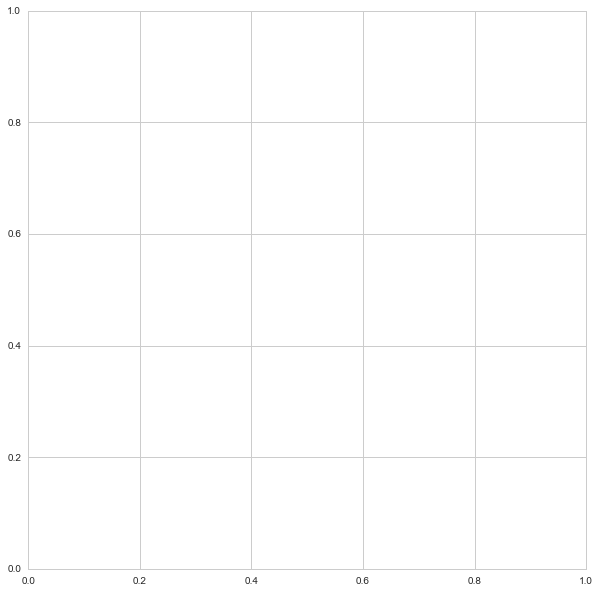

In [7]:
for mbon_name in kc_rosette_kc_mats.keys():

    fig = pylab.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)

    rosette_mat = kc_rosette_kc_mats[mbon_name]
    conn_mat = rosette_mat[:, :, 2:].sum(axis=2)
    
    
    kc_kc_mat = kc_kc_mats[mbon_name]
    conn_rand = conn_mat[rand_idx]
    conn_rand = conn_rand[:, rand_idx]
    
    kc_kc_sorted = kc_kc_mat[rand_idx]
    kc_kc_sorted = kc_kc_sorted[:, rand_idx]
    
    
    a = np.argwhere(conn_rand)
    print len(a)
    counts = np.array([conn_rand[i, j] for i, j in a])
    ax.scatter(a[:, 0], a[:, 1], edgecolor='none', c='r',
               s=10*counts**2, alpha=0.1)
    ax.set_xlim(0, KCN)
    ax.set_ylim(KCN, 0)
    
    im = np.ones((kc_kc_sorted.shape[0], kc_kc_sorted.shape[1], 4))
    im[:, :, 2] = 1-kc_kc_sorted
    im[:, :, 0] = 1-kc_kc_sorted
    im[:, :, 1] = 1-kc_kc_sorted
    im[:, :, 3] = kc_kc_sorted * 0.05
    ax.imshow(im)
    ticks = np.arange(0, len(pre_ids_names), 20)
    ax.set_yticks(ticks)
    ax.set_yticklabels(pre_ids_names_sorted[ticks])
    ax.set_xticks(ticks)
    ax.set_xticklabels(pre_ids_names_sorted[ticks], rotation=90)
    #ax.set_yticks([])
    ax.set_title(mbon_name)
    ax.grid(False)
    ax.set_xlabel("kenyon cell ID")
    ax.set_ylabel("kenyon cell ID")
    fig.savefig("kc-rosette-kc %s.png" % mbon_name, dpi=300)
    break